# 1 Select a real-world dataset
TODO - add some explanation here

Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
The data should be in CSV format, and should contain at least 10 columns and 200 rows

## 1.1Import the module

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


# 2 Perform data preparation & cleaning
Instructions (delete this cell):

Load the dataset into a data frame using Pandas
Explore the number of rows & columns, ranges of values etc.
Handle missing, incorrect and invalid data
Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

## 2.1 Read data

In [3]:
df = pd.read_csv("../data/Table Data.csv") # Read the data

In [4]:
df.shape # Check the shape of data

(1465, 15)

In [5]:
df.head() # Check the head data 

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,orderTime
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,user-157946,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,2023/5/7 16:39:23
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,0.43,4,43994.0,"Compatible with all Type C enabled devices, be...",user-157441,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,2023/12/16 20:14:12
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,user-157222,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",2023/4/9 19:22:54
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,user-157922,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",2023/10/10 20:00:12
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,user-157545,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2023/6/14 21:18:26


In [6]:
df.info

<bound method DataFrame.info of       product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories

In [7]:
# Convert the 'actual_price' column to a numeric type. If there's an error during conversion,
# replace the problematic value with NaN.
df.loc[:, 'actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Convert the 'discounted_price' column to a numeric type. If there's an error during conversion,
# replace the problematic value with NaN.
df.loc[:, 'discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     828 non-null    object 
 4   actual_price         531 non-null    object 
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  orderTime            1465 non-null   object 
dtypes: float64(2), object(13)
memory usage

,discount_percentage,rating_count
count,1465.000000,1463.000000
mean,0.476887,18295.541353
std,0.216193,42753.864952
min,0.000000,2.000000
25%,0.320000,1186.000000
50%,0.500000,5179.000000
75%,0.630000,17336.500000
max,0.940000,426973.000000


## 2.3 Cleaning product_id

In [9]:
df.product_id.unique().size

1351

In [10]:
df.product_id.duplicated() # Check for duplicates, if true, otherwise false

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Name: product_id, Length: 1465, dtype: bool

In [11]:
#Duplicated() Duplicated() obtains the Boolean value for determining duplicate values, and then selects non duplicate values that have a Boolean value of False
df.drop(index=df[df.product_id.duplicated()].index, inplace=True)
df.product_id.unique().size 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1351 non-null   object 
 1   product_name         1351 non-null   object 
 2   category             1351 non-null   object 
 3   discounted_price     738 non-null    object 
 4   actual_price         464 non-null    object 
 5   discount_percentage  1351 non-null   float64
 6   rating               1351 non-null   object 
 7   rating_count         1349 non-null   float64
 8   about_product        1351 non-null   object 
 9   user_id              1351 non-null   object 
 10  user_name            1351 non-null   object 
 11  review_id            1351 non-null   object 
 12  review_title         1351 non-null   object 
 13  review_content       1351 non-null   object 
 14  orderTime            1351 non-null   object 
dtypes: float64(2), object(13)
memory usage: 168

## 2.4 Cleaning actual_price

In [12]:
#Check and delete the NaN value in the actual_price column
df.loc[df['actual_price'].isna(), 'discount_percentage'] = pd.NA

## 2.5 Cleaning discounted_price

In [13]:
#Check and delete the NaN value in the actual_price column
df.loc[df['discounted_price'].isna(), 'discount_percentage'] = pd.NA


## 2.6 Cleaning discount_percentage

In [14]:
df = df.dropna(subset=['discounted_price']) # Remove rows with NaN values in the 'discounted_price' column
df = df.dropna(subset=['actual_price']) # Remove rows with NaN values in the 'actual_price' column

df # Print df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,orderTime
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4,43994.0,"Compatible with all Type C enabled devices, be...",user-157441,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,2023/12/16 20:14:12
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,user-157922,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",2023/10/10 20:00:12
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,user-157545,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2023/6/14 21:18:26
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,0.65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,user-157961,"Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,2023/4/19 17:08:19
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.0,299.0,0.23,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,user-157539,"Pavan A H,Jayesh bagad,Shridhar,rajendran,karu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,2023/1/21 16:15:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,B09LMMFW3S,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...","Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",229.0,399.0,0.43,3.6,451.0,Frothes milk up in 15-20 seconds.|Can be used ...,user-158203,"ANURAG,Amazon Customer,Pallavi Jaiswal,Anshita...","R1K0ML8QPZZSH7,R1VJZH5L1SRLPA,R2TTZ6Y61C1955,R...","Rechargable batteries do not fit correctly,Oka...",While it makes enough froth under 1.5mins (tes...,2023/10/30 17:45:57
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199.0,699.0,0.72,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,user-157448,"Anmol Khanna,G.l.sudhakar,Amazon Customer,mano...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",2023/5/27 19:02:04
1452,B0B8CB7MHW,KNOWZA Electric Handheld Milk Wand Mixer Froth...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,426.0,999.0,0.57,4.1,222.0,"Make Rich & Creamy Froth In Seconds, Then Say ...",user-157758,"Deepak B.,Azhar s.,Yogesh Rajput,Amit V.,Manee...","R18ND09BJJWOI1,R35PEU0UI25EJQ,R1PUXDH1YJ1C7P,R...","Good product,Very nice product,The product Is ...","Nice product,,The overall quality of product I...",2023/1/12 22:52:52
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",199.0,999.0,0.80,3.1,2.0,"Versatile, Protects Your Clothes: MoveCatcher ...",user-157598,Kunal Sen,R18OKMWGX8SA0L,Useless,Does not work as advertised at all. The pieces...,2023/2/13 20:28:33

## 2.7 Cleaning user_name

In [15]:
df.user_name.unique().size

422

In [16]:
# Get the count of unique user names in the DataFrame
df.user_name.unique().size

# List all unique user names in the DataFrame
df.user_name.unique()

# Remove leading and trailing spaces from user names
df['user_name'] = df['user_name'].map(str.strip)

# Remove any spaces within user names
df['user_name'] = df['user_name'].str.replace(" ", "")

# List all unique user names after cleaning
df.user_name.unique()


array(['ArdKn,Nirbhaykumar,SagarViswanathan,Asp,Placeholder,BharanI,sonia,Niam',
       'Omkardhale,JD,HEMALATHA,Ajwadha.,amarsinghchouhan,RaviSiddan,HimanshuGoel,Udaykumar',
       'rahuls6099,SwasatBorah,AjayWadke,Pranali,RVK,Bhargav,DuraiVignesh,AmazonCustomer',
       'Vivekkumar,AmazonCustomer,SARTHAK,Chiranjeevi,VVGIRIKUMAR,Rajnandini,AkshayTalla,sudhanshuchaubey',
       'PavanAH,Jayeshbagad,Shridhar,rajendran,karuppuk,Akshaywani,AbbimaniuSingh,VISHALHBADSHE',
       'AzharJuMan,AnirudhSood,HariKrishnanPS,AkashJindal,PRADEEP,Rajesh,DivyaKothari,abhijit',
       'Tanya,Anu,Akshay,VishalSagaraShetty,SwatilekhaSarkar,Jithindas,IBRAHIMS,SundaramJ.',
       'RishavGossain,ShashankMallamraju,Purnendu,gunasekarandesomayananam,AntoRK,SukritBasak,ManojKumar,Sethuram.S',
       'Priya,Mansi,Plaban,Vivek,TaufiqueAhmed,Praveenkumar,Robbin,arjunsharma',
       'DeepaakSingh,sivak.,MUNDATHBALGOPAL,BOOPATHI,Rakesh,Ana,Xolo,Rushi',
       'BirendrakuDash,AdityaGupta,AbdullaAN,Deepak,Gowtham,Rak

## 2.8 Cleaning rating

In [17]:
rating_column = df.loc[:, 'rating'] # Ranking in descending order
rating_column
# Check for NaN values and handle them
if df['rating'].isnull().any():
    print("There are NaN values present, remove these rows")
    df = df.dropna(subset=['rating'])


# Check the unique value of the rating column
print("Unique value of rating：", df['rating'].unique())


Unique value of rating： ['4' '4.2' '4.1' '4.3' '4.4' '3.7' '4.5' '3.9' '3.3' '3.6' '3.8' '3.5'
 '3.4' '3' '5' '4.6' '4.8' '2.6' '2.9' '3.1']


## 2.9 Cleaning rating_count

In [18]:
df_sorted_by_rating_count = df.sort_values(by='rating_count', ascending=False)
rating_count_series = df_sorted_by_rating_count.loc[:, 'rating_count'] # Rank rating_count in descending order
rating_count_series
# Check for NaN values and handle them
if df['rating_count'].isnull().any():
    print("There are NaN values present, remove these rows")
    df = df.dropna(subset=['rating_count'])

There are NaN values present, remove these rows


## 2.10 Finish Cleaning

In [19]:
df.shape

(462, 15)

# 3 Perform exploratory analysis & visualization
TODO - write some explanation here.
Instructions (delete this cell)

Compute the mean, sum, range and other interesting statistics for numeric columns
Explore distributions of numeric columns using histograms etc.
Explore relationship between columns using scatter plots, bar charts etc.
Make a note of interesting insights from the exploratory analysis

 Let's begin by importingmatplotlib.pyplot and seaborn.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Set Seaborn's plotting style to 'darkgrid'
sns.set_style('darkgrid')

# Set font size for Matplotlib plots
matplotlib.rcParams['font.size'] = 14

# Set figure size for Matplotlib plots
matplotlib.rcParams['figure.figsize'] = (9, 5)

# Set the face color of the figure to transparent
matplotlib.rcParams['figure.facecolor'] = '#00000000'

TODO - Explore one or more columns by plotting a graph below, and add some explanation about it

## 3.1 Analyse the discounted_price

In [21]:
# actual_price
actual_price_total = df['actual_price'].sum() / 10000 
print(f"Total actual price (10000 yuan): {actual_price_total}")

# discounted_price
discounted_price_total = df['discounted_price'].sum() / 10000
print(f"Total discount price (10000 yuan): {discounted_price_total}") 



Total actual price (10000 yuan): 29.716266000000005
Total discount price (10000 yuan): 14.212837


In [22]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,orderTime
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4,43994.0,"Compatible with all Type C enabled devices, be...",user-157441,"ArdKn,Nirbhaykumar,SagarViswanathan,Asp,Placeh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,2023/12/16 20:14:12
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,user-157922,"Omkardhale,JD,HEMALATHA,Ajwadha.,amarsinghchou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",2023/10/10 20:00:12
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,user-157545,"rahuls6099,SwasatBorah,AjayWadke,Pranali,RVK,B...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2023/6/14 21:18:26
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,0.65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,user-157961,"Vivekkumar,AmazonCustomer,SARTHAK,Chiranjeevi,...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,2023/4/19 17:08:19
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.0,299.0,0.23,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,user-157539,"PavanAH,Jayeshbagad,Shridhar,rajendran,karuppu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,2023/1/21 16:15:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,B09LMMFW3S,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...","Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",229.0,399.0,0.43,3.6,451.0,Frothes milk up in 15-20 seconds.|Can be used ...,user-158203,"ANURAG,AmazonCustomer,PallaviJaiswal,Anshita,P...","R1K0ML8QPZZSH7,R1VJZH5L1SRLPA,R2TTZ6Y61C1955,R...","Rechargable batteries do not fit correctly,Oka...",While it makes enough froth under 1.5mins (tes...,2023/10/30 17:45:57
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199.0,699.0,0.72,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,user-157448,"AnmolKhanna,G.l.sudhakar,AmazonCustomer,manoj,...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",2023/5/27 19:02:04
1452,B0B8CB7MHW,KNOWZA Electric Handheld Milk Wand Mixer Froth...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,426.0,999.0,0.57,4.1,222.0,"Make Rich & Creamy Froth In Seconds, Then Say ...",user-157758,"DeepakB.,Azhars.,YogeshRajput,AmitV.,ManeeshaB...","R18ND09BJJWOI1,R35PEU0UI25EJQ,R1PUXDH1YJ1C7P,R...","Good product,Very nice product,The product Is ...","Nice product,,The overall quality of product I...",2023/1/12 22:52:52
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",199.0,999.0,0.80,3.1,2.0,"Versatile, Protects Your Clothes: MoveCatcher ...",user-157598,KunalSen,R18OKMWGX8SA0L,Useless,Does not work as advertised at all. The pieces...,2023/2/13 20:28:33


## 3.2 Trend in each months

<>:10: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\W'
C:\Users\16348\AppData\Local\Temp\ipykernel_52160\2116629898.py:10: SyntaxWarning: invalid escape sequence '\W'
  my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\msyh.ttc',size=12)
C:\Users\16348\AppData\Local\Temp\ipykernel_52160\2116629898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orderTime'] = pd.to_datetime(df['orderTime'])
C:\Users\16348\AppData\Local\Temp\ipykernel_52160\2116629898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

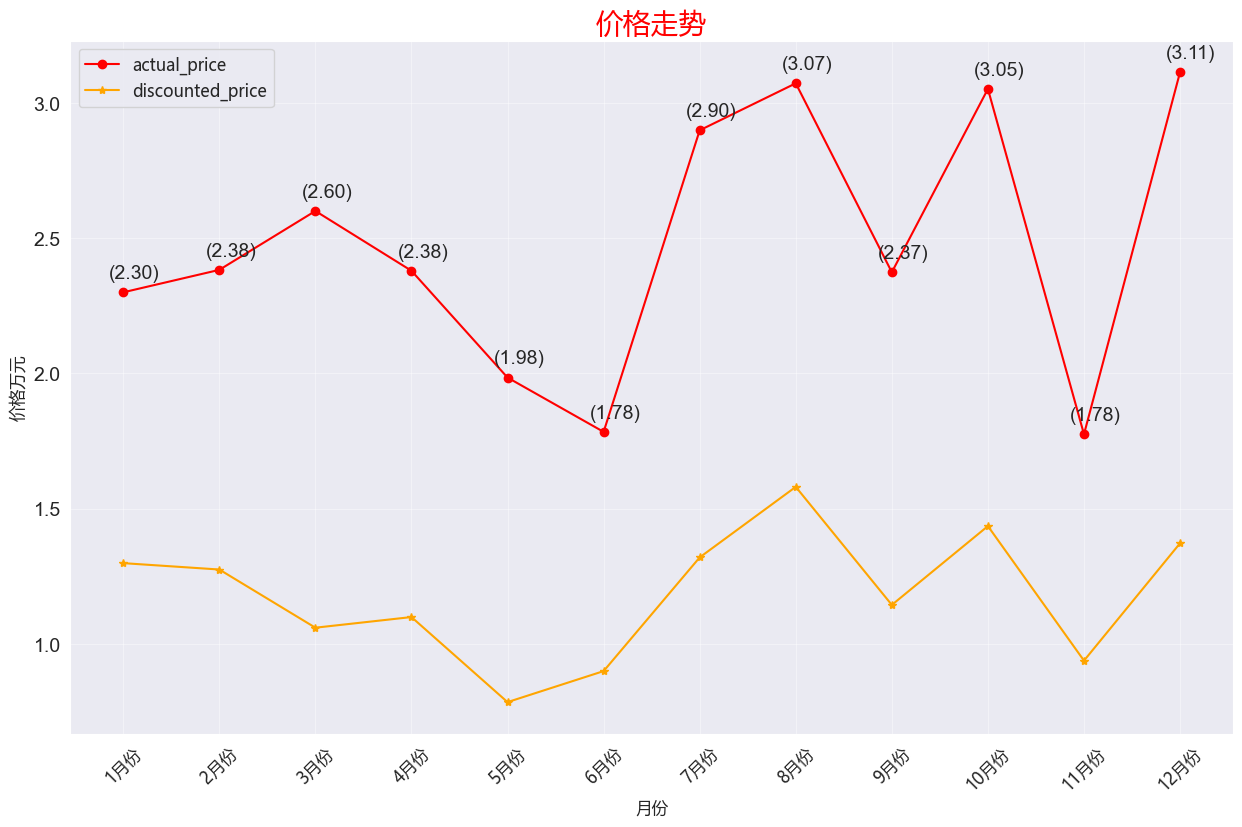

In [23]:
#1.month
df['orderTime'] = pd.to_datetime(df['orderTime'])
df['month'] = df['orderTime'].dt.month
df
#2.draw the plot
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline
# mac fc-list : lang =zh
my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\msyh.ttc',size=12)
# size
plt.figure(figsize=(15,9))

plt.grid(alpha=0.4)

# Ensure that the actual price and discount price columns are numerical types
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Summarize data by month
x = df.groupby('month')['actual_price'].sum().index 
x 
y1 = df.groupby('month')['actual_price'].sum().values/10000
y2 = df.groupby('month')['discounted_price'].sum().values/10000

x_ticks_label = ["{}月份".format(i) for i in x]
plt.xticks(x,x_ticks_label,rotation = 45,fontproperties = my_font)

# plot 
plt.plot(x,y1,label='actual_price',color="red",marker='o')
plt.plot(x,y2,label='discounted_price',color="orange",marker='*')


plt.xlabel('月份',fontproperties=my_font)
plt.ylabel("价格万元",fontproperties=my_font)
plt.title('价格走势',fontproperties=my_font,color='red',size=20)
# Adding Coordinates for Fold Points
for a,b in zip(x,y1):
    plt.annotate('(%.2f)'%(b),xy=(a,b),xytext=(-10,10),textcoords='offset points')
# plot
plt.legend(prop=my_font,loc='upper left')
plt.show()

TODO - Explore one or more columns by plotting a graph below, and add some explanation about it

## 3.3 Analyse the rating

In [24]:
# Calculate average score

# Ensure that rating is of numerical type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_rating = df['rating'].mean()
average_rating

C:\Users\16348\AppData\Local\Temp\ipykernel_52160\1926545168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


4.078354978354978

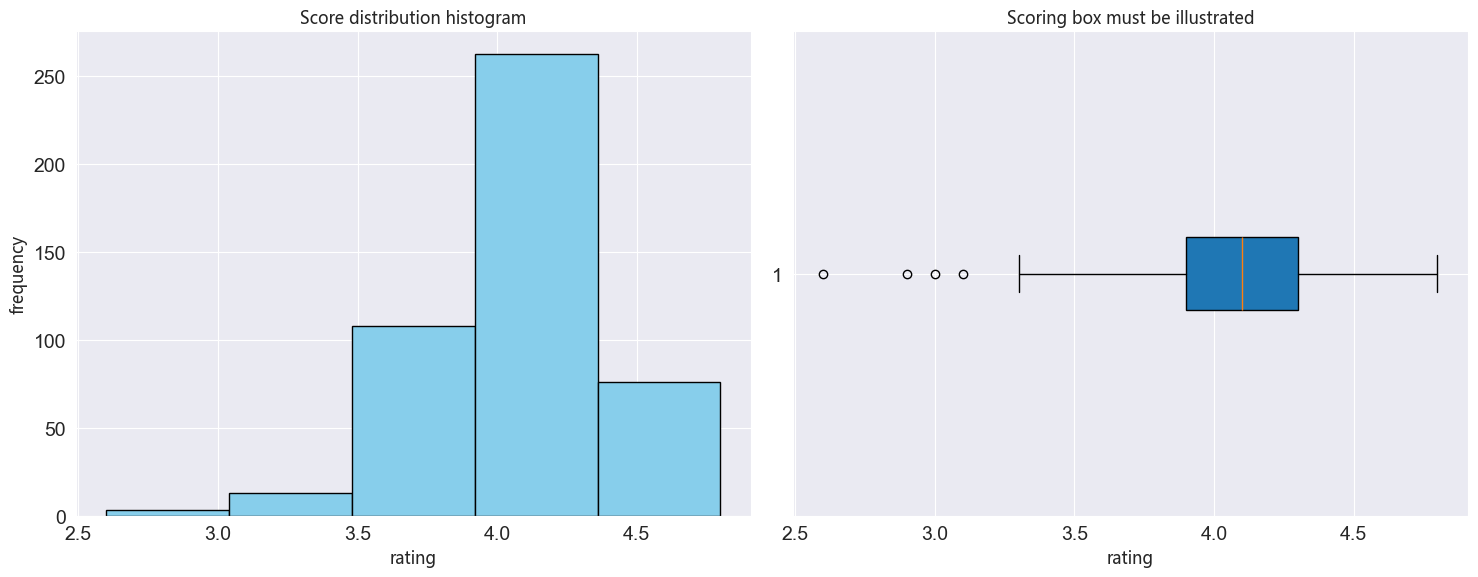

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set font
my_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\msyh.ttc', size=12)

# Create charts
plt.figure(figsize=(15, 6))

# histogram
plt.subplot(1, 2, 1)
plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('rating', fontproperties=my_font)
plt.ylabel('frequency', fontproperties=my_font)
plt.title('Score distribution histogram', fontproperties=my_font)

# box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['rating'], vert=False, patch_artist=True)
plt.xlabel('rating', fontproperties=my_font)
plt.title('Scoring box must be illustrated', fontproperties=my_font)

# Display chart
plt.tight_layout()
plt.show()


## 3.4 Analyse which day has most transcation

In [28]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,orderTime,month
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...",user-157441,"ArdKn,Nirbhaykumar,SagarViswanathan,Asp,Placeh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,2023-12-16 20:14:12,12
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,user-157922,"Omkardhale,JD,HEMALATHA,Ajwadha.,amarsinghchou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",2023-10-10 20:00:12,10
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,user-157545,"rahuls6099,SwasatBorah,AjayWadke,Pranali,RVK,B...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2023-06-14 21:18:26,6
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,0.65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,user-157961,"Vivekkumar,AmazonCustomer,SARTHAK,Chiranjeevi,...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,2023-04-19 17:08:19,4
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.00,299.0,0.23,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,user-157539,"PavanAH,Jayeshbagad,Shridhar,rajendran,karuppu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,2023-01-21 16:15:40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,B09LMMFW3S,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...","Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",229.00,399.0,0.43,3.6,451.0,Frothes milk up in 15-20 seconds.|Can be used ...,user-158203,"ANURAG,AmazonCustomer,PallaviJaiswal,Anshita,P...","R1K0ML8QPZZSH7,R1VJZH5L1SRLPA,R2TTZ6Y61C1955,R...","Rechargable batteries do not fit correctly,Oka...",While it makes enough froth under 1.5mins (tes...,2023-10-30 17:45:57,10
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199.00,699.0,0.72,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,user-157448,"AnmolKhanna,G.l.sudhakar,AmazonCustomer,manoj,...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",2023-05-27 19:02:04,5
1452,B0B8CB7MHW,KNOWZA Electric Handheld Milk Wand Mixer Froth...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,426.00,999.0,0.57,4.1,222.0,"Make Rich & Creamy Froth In Seconds, Then Say ...",user-157758,"DeepakB.,Azhars.,YogeshRajput,AmitV.,ManeeshaB...","R18ND09BJJWOI1,R35PEU0UI25EJQ,R1PUXDH1YJ1C7P,R...","Good product,Very nice product,The product Is ...","Nice product,,The overall quality of product I...",2023-01-12 22:52:52,1
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",199.00,999.0,0.80,3.1,2.0,"Versatile, Protects Your Clothes: MoveCatcher ...",user-157598,KunalSen,R18OKMWGX8SA0L,Useless,Does not work as advertis

In [29]:
#1. Process the day of the week field

#0 corresponds to Monday
df['dayofweek'] = df['orderTime'].dt.dayofweek
df['dayofweek'].unique()
df

C:\Users\16348\AppData\Local\Temp\ipykernel_52160\1769069448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['orderTime'].dt.dayofweek


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,orderTime,month,dayofweek
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...",user-157441,"ArdKn,Nirbhaykumar,SagarViswanathan,Asp,Placeh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,2023-12-16 20:14:12,12,5
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,user-157922,"Omkardhale,JD,HEMALATHA,Ajwadha.,amarsinghchou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",2023-10-10 20:00:12,10,1
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,user-157545,"rahuls6099,SwasatBorah,AjayWadke,Pranali,RVK,B...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2023-06-14 21:18:26,6,2
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,0.65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,user-157961,"Vivekkumar,AmazonCustomer,SARTHAK,Chiranjeevi,...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,2023-04-19 17:08:19,4,2
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.00,299.0,0.23,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,user-157539,"PavanAH,Jayeshbagad,Shridhar,rajendran,karuppu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,2023-01-21 16:15:40,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,B09LMMFW3S,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...","Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",229.00,399.0,0.43,3.6,451.0,Frothes milk up in 15-20 seconds.|Can be used ...,user-158203,"ANURAG,AmazonCustomer,PallaviJaiswal,Anshita,P...","R1K0ML8QPZZSH7,R1VJZH5L1SRLPA,R2TTZ6Y61C1955,R...","Rechargable batteries do not fit correctly,Oka...",While it makes enough froth under 1.5mins (tes...,2023-10-30 17:45:57,10,0
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199.00,699.0,0.72,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,user-157448,"AnmolKhanna,G.l.sudhakar,AmazonCustomer,manoj,...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",2023-05-27 19:02:04,5,5
1452,B0B8CB7MHW,KNOWZA Electric Handheld Milk Wand Mixer Froth...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,426.00,999.0,0.57,4.1,222.0,"Make Rich & Creamy Froth In Seconds, Then Say ...",user-157758,"DeepakB.,Azhars.,YogeshRajput,AmitV.,ManeeshaB...","R18ND09BJJWOI1,R35PEU0UI25EJQ,R1PUXDH1YJ1C7P,R...","Good product,Very nice product,The product Is ...","Nice product,,The overall quality of product I...",2023-01-12 22:52:52,1,3
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",199.00,999.0,0.80,3.1,2.0,"Versatile, Protects Your Clothes: MoveCatcher ...",user-157598,KunalSen,R18OKMWGX8SA0L,Use

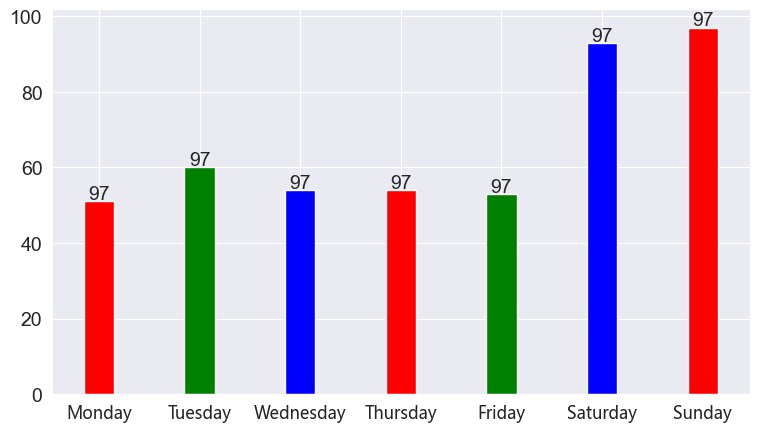

In [32]:
# Import NumPy library
import numpy as np

# Aggregate data by day of the week
week = df.groupby('dayofweek')['user_id'].count()
week

# Define day names where 0 represents Monday
weekX = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Extract counts for each day of the week
weekY = week.values

# Set x-ticks to day names
plt.xticks(range(len(weekX)), weekX, fontproperties=my_font)

# Create a bar chart
rects = plt.bar(range(len(weekX)), weekY, width=0.3, color=['r', 'g', 'b', 'r', 'g', 'b'])

# Annotate bars with their heights
for rect in rects:
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.5, str(height), ha="center")

# Display the bar chart
plt.show()


## 3.5 User behavior, which time period has a high order volume

In [34]:
df1 = df.copy()
df1['orderTime'] = df1['orderTime'].dt.time
df1 

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,orderTime,month,dayofweek
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...",user-157441,"ArdKn,Nirbhaykumar,SagarViswanathan,Asp,Placeh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,20:14:12,12,5
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,user-157922,"Omkardhale,JD,HEMALATHA,Ajwadha.,amarsinghchou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",20:00:12,10,1
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,user-157545,"rahuls6099,SwasatBorah,AjayWadke,Pranali,RVK,B...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",21:18:26,6,2
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,0.65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,user-157961,"Vivekkumar,AmazonCustomer,SARTHAK,Chiranjeevi,...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,17:08:19,4,2
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.00,299.0,0.23,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,user-157539,"PavanAH,Jayeshbagad,Shridhar,rajendran,karuppu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,16:15:40,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,B09LMMFW3S,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...","Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",229.00,399.0,0.43,3.6,451.0,Frothes milk up in 15-20 seconds.|Can be used ...,user-158203,"ANURAG,AmazonCustomer,PallaviJaiswal,Anshita,P...","R1K0ML8QPZZSH7,R1VJZH5L1SRLPA,R2TTZ6Y61C1955,R...","Rechargable batteries do not fit correctly,Oka...",While it makes enough froth under 1.5mins (tes...,17:45:57,10,0
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199.00,699.0,0.72,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,user-157448,"AnmolKhanna,G.l.sudhakar,AmazonCustomer,manoj,...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",19:02:04,5,5
1452,B0B8CB7MHW,KNOWZA Electric Handheld Milk Wand Mixer Froth...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,426.00,999.0,0.57,4.1,222.0,"Make Rich & Creamy Froth In Seconds, Then Say ...",user-157758,"DeepakB.,Azhars.,YogeshRajput,AmitV.,ManeeshaB...","R18ND09BJJWOI1,R35PEU0UI25EJQ,R1PUXDH1YJ1C7P,R...","Good product,Very nice product,The product Is ...","Nice product,,The overall quality of product I...",22:52:52,1,3
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",199.00,999.0,0.80,3.1,2.0,"Versatile, Protects Your Clothes: MoveCatcher ...",user-157598,KunalSen,R18OKMWGX8SA0L,Useless,Does not work as advertised at all. The pieces...,20:28:33,2,0


C:\Users\16348\AppData\Local\Temp\ipykernel_52160\346788568.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  s = df1['orderTime'].dt.floor('30T')


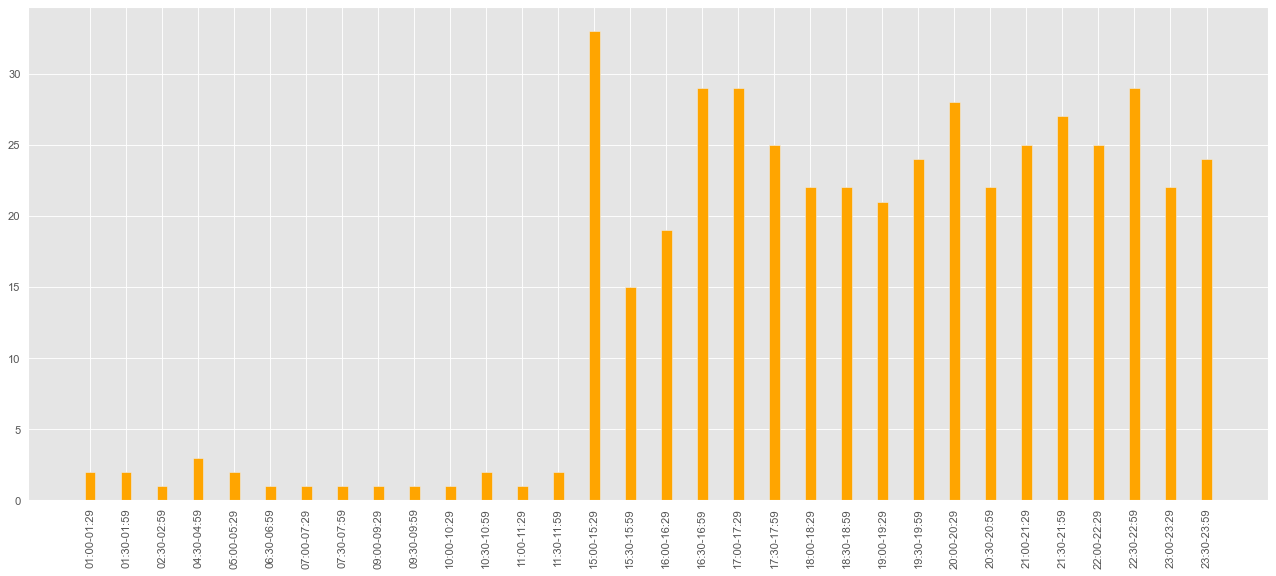

In [35]:
# Import datetime modules
from datetime import datetime, date

# Combine today's date with the order time, assuming orderTime is already in time format
df1['orderTime'] = df1['orderTime'].apply(lambda t: datetime.combine(date.today(), t))

# Set figure size and DPI for plots
plt.figure(figsize=(20,8), dpi=80)

# Round order times down to the nearest 30-minute interval
s = df1['orderTime'].dt.floor('30T')

# Create time bins for each 30-minute interval and assign to 'orderTime'
df1['orderTime'] = s.dt.strftime('%H:%M') + '-' + (s + pd.Timedelta(29 * 60, unit='s')).dt.strftime('%H:%M')

# Count the number of user IDs per 30-minute interval
tiemdf = df1.groupby('orderTime')['user_id'].count()

# Extract indexes and values for plotting
tiemdfX = tiemdf.index
tiemdfY = tiemdf.values

# Set the plot style to 'ggplot'
plt.style.use('ggplot')

# Set the x-ticks to time intervals with 90-degree rotation
plt.xticks(range(len(tiemdfX)), tiemdfX, rotation=90)

# Create a bar chart with specified width and color
rect = plt.bar(tiemdfX, tiemdfY, width=0.3, color=['orange'])

# Display the bar chart
plt.show()


## 3.6 User behavior, customer situation

In [36]:
#1. Customer unit price
df.actual_price.sum()/df.user_id.unique().size 

724.7869756097562

In [37]:
import pandas as pd
# Convert user_id to string type
df['user_id'] = df['user_id'].astype(str)

# Process the user_id field and only retain the last four digits as indexes
df['user_id'] = df['user_id'].str[-4:]

# Check the unique value of user_id
df['user_id'].unique()

# Output data boxes to check results
df

C:\Users\16348\AppData\Local\Temp\ipykernel_52160\2173655402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = df['user_id'].astype(str)
C:\Users\16348\AppData\Local\Temp\ipykernel_52160\2173655402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = df['user_id'].str[-4:]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,orderTime,month,dayofweek
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...",7441,"ArdKn,Nirbhaykumar,SagarViswanathan,Asp,Placeh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,2023-12-16 20:14:12,12,5
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,7922,"Omkardhale,JD,HEMALATHA,Ajwadha.,amarsinghchou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",2023-10-10 20:00:12,10,1
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,7545,"rahuls6099,SwasatBorah,AjayWadke,Pranali,RVK,B...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2023-06-14 21:18:26,6,2
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,0.65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,7961,"Vivekkumar,AmazonCustomer,SARTHAK,Chiranjeevi,...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,2023-04-19 17:08:19,4,2
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.00,299.0,0.23,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,7539,"PavanAH,Jayeshbagad,Shridhar,rajendran,karuppu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,2023-01-21 16:15:40,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,B09LMMFW3S,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...","Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",229.00,399.0,0.43,3.6,451.0,Frothes milk up in 15-20 seconds.|Can be used ...,8203,"ANURAG,AmazonCustomer,PallaviJaiswal,Anshita,P...","R1K0ML8QPZZSH7,R1VJZH5L1SRLPA,R2TTZ6Y61C1955,R...","Rechargable batteries do not fit correctly,Oka...",While it makes enough froth under 1.5mins (tes...,2023-10-30 17:45:57,10,0
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199.00,699.0,0.72,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,7448,"AnmolKhanna,G.l.sudhakar,AmazonCustomer,manoj,...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",2023-05-27 19:02:04,5,5
1452,B0B8CB7MHW,KNOWZA Electric Handheld Milk Wand Mixer Froth...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,426.00,999.0,0.57,4.1,222.0,"Make Rich & Creamy Froth In Seconds, Then Say ...",7758,"DeepakB.,Azhars.,YogeshRajput,AmitV.,ManeeshaB...","R18ND09BJJWOI1,R35PEU0UI25EJQ,R1PUXDH1YJ1C7P,R...","Good product,Very nice product,The product Is ...","Nice product,,The overall quality of product I...",2023-01-12 22:52:52,1,3
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",199.00,999.0,0.80,3.1,2.0,"Versatile, Protects Your Clothes: MoveCatcher ...",7598,KunalSen,R18OKMWGX8SA0L,Useless,Does not work as advertised at all. The pieces...,2023-02-

## 3.7 User behavior, customer repurchase rate

In [ ]:
df

In [38]:
#Analyze repurchase rate and repurchase rate

#Firstly, conduct a data perspective on user consumption data.

#I hope to track the monthly order volume for each user, so userID is index and month is column.
pivoted_counts=df.pivot_table(index='user_id',columns='month',
                             values='orderTime',aggfunc='count').fillna(0)
pivoted_counts.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
7215,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7216,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7219,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\16348\AppData\Local\Temp\ipykernel_52160\1439758748.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pcRepeatBuy = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)


<Axes: xlabel='month'>

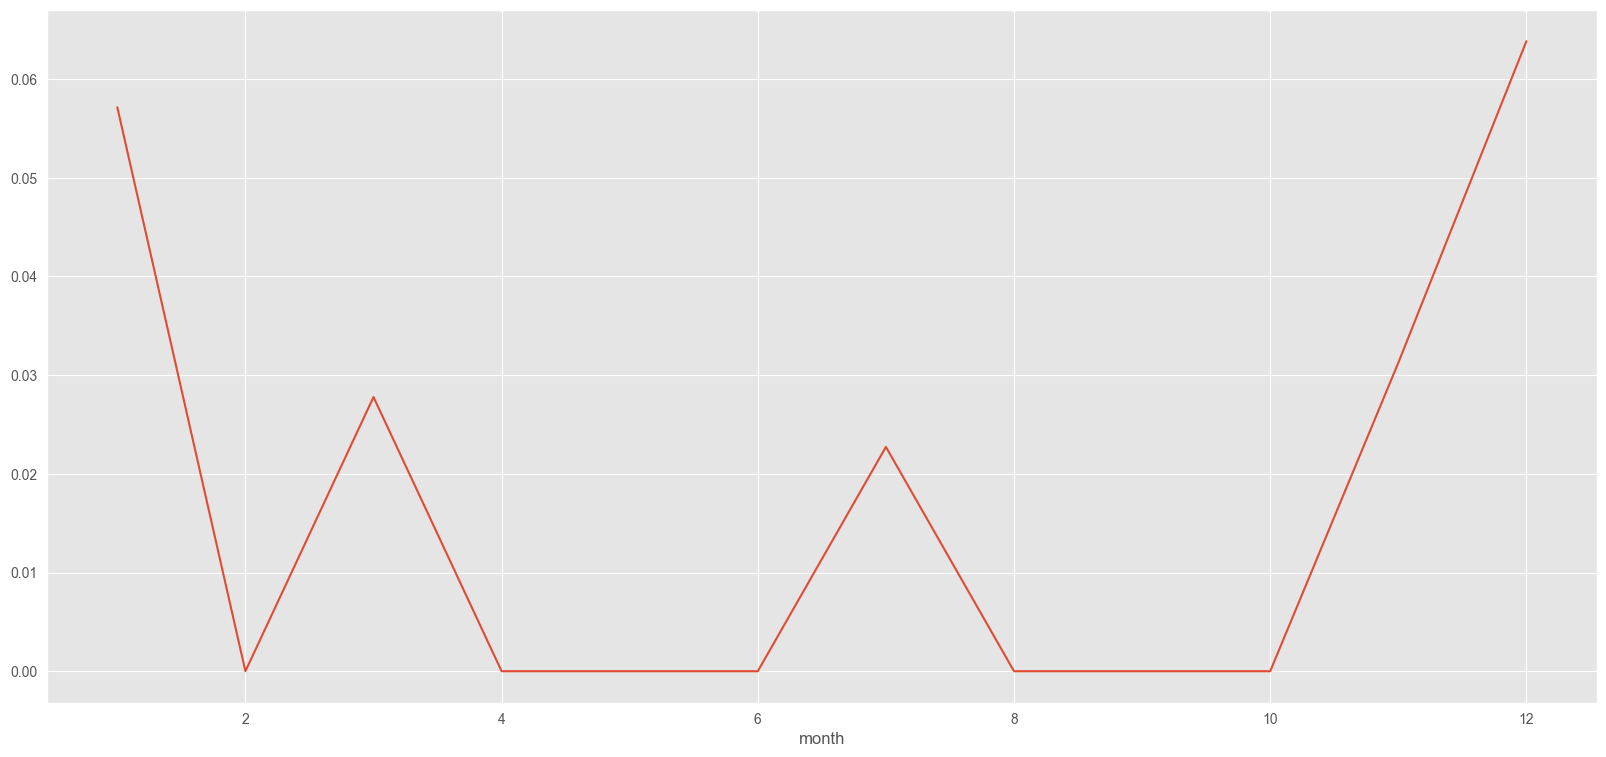

In [40]:
#复购率

# Import NumPy library
import numpy as np

# Create a pivot table where 1 represents repeat buys, NaN represents no buys, and 0 represents single buys
pcRepeatBuy = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)

# Display the first few rows of the pivot table
pcRepeatBuy.head()

# Calculate the proportion of repeat buys and plot the result
(pcRepeatBuy.sum()/pcRepeatBuy.count()).plot(figsize=(20,9))


#  Step 4: Perform diagnositc analysis & visualization

Instructions (delete this cell)

Ask at least 5 interesting questions about your dataset
Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does

## Question 1: How to check the relationship between discounted_price and Actual_price, and whether discount_percentage accurately reflects the difference between the two?

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate actual discount rate
df['calculated_discount'] = (df['actual_price'] - df['discounted_price']) / df['actual_price']

# Find inaccurate data with differences exceeding a certain threshold
threshold = 0.01
df['difference'] = abs(df['calculated_discount'] - df['discount_percentage'])
inaccurate_discounts = df[df['difference'] > threshold]

# Display inaccurate data
print("Inaccurate data:\n", inaccurate_discounts)

# Draw a chart
plt.figure(figsize=(10, 6))



Inaccurate data:
       product_id                                       product_name  \
15    B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
90    B0141EZMAI  Gizga Essentials USB WiFi Adapter for PC, 150 ...   
202   B07ZR4S1G4  Universal Remote Control for All Sony TV for A...   
832   B01DGVKBC6  FEDUS Cat6 Ethernet Cable, 10 Meter High Speed...   
1408  B0B59K1C8F  Wolpin 1 Lint Roller with 60 Sheets Remove Clo...   

                                               category  discounted_price  \
15    Computers&Accessories|Accessories&Peripherals|...             349.0   
90    Computers&Accessories|NetworkingDevices|Networ...             269.0   
202   Electronics|HomeTheater,TV&Video|Accessories|R...             239.0   
832   Computers&Accessories|Accessories&Peripherals|...             287.0   
1408  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...             179.0   

      actual_price  discount_percentage  rating  rating_count  \
15           399.0         

C:\Users\16348\AppData\Local\Temp\ipykernel_52160\2321666236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['calculated_discount'] = (df['actual_price'] - df['discounted_price']) / df['actual_price']
C:\Users\16348\AppData\Local\Temp\ipykernel_52160\2321666236.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference'] = abs(df['calculated_discount'] - df['discount_percentage'])


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

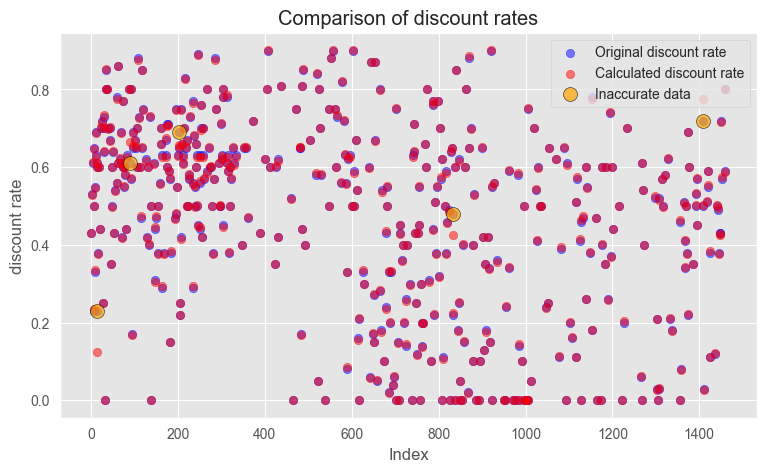

Inaccurate data DataFrame:
       product_id                                       product_name  \
15    B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
90    B0141EZMAI  Gizga Essentials USB WiFi Adapter for PC, 150 ...   
202   B07ZR4S1G4  Universal Remote Control for All Sony TV for A...   
832   B01DGVKBC6  FEDUS Cat6 Ethernet Cable, 10 Meter High Speed...   
1408  B0B59K1C8F  Wolpin 1 Lint Roller with 60 Sheets Remove Clo...   

                                               category  discounted_price  \
15    Computers&Accessories|Accessories&Peripherals|...             349.0   
90    Computers&Accessories|NetworkingDevices|Networ...             269.0   
202   Electronics|HomeTheater,TV&Video|Accessories|R...             239.0   
832   Computers&Accessories|Accessories&Peripherals|...             287.0   
1408  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...             179.0   

      actual_price  discount_percentage  rating  rating_count  \
15           399.

In [43]:
# Original discount rate
plt.scatter(df.index, df['discount_percentage'], color='blue', label='Original discount rate', alpha=0.5)

# Calculated discount rate
plt.scatter(df.index, df['calculated_discount'], color='red', label='Calculated discount rate', alpha=0.5)

# Highlight inaccurate data
plt.scatter(inaccurate_discounts.index, inaccurate_discounts['discount_percentage'], color='orange', label='Inaccurate data', edgecolor='black', s=100, alpha=0.7)

plt.xlabel('Index')
plt.ylabel('discount rate')
plt.title('Comparison of discount rates')
plt.legend()
plt.grid(True)

# Display chart
plt.show()

# Display inaccurate data in the form of DataFrame
print("Inaccurate data DataFrame:\n", inaccurate_discounts)


## Question 2: Does discount_percentage have a significant impact on the rating of a product?

The correlation coefficient between discount percentage and average score: -0.4701449972741723


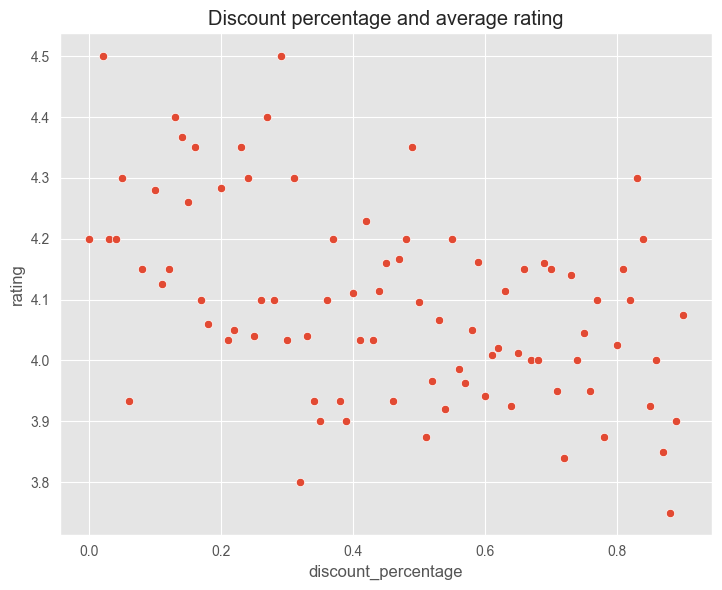

In [45]:
# Define a function to analyze the effect of discounts on ratings
def discount_effect_analysis(df):
    # Group by discount percentage and aggregate average rating and sum of rating counts
    discount_effect = df.groupby('discount_percentage').agg({
        'rating': 'mean',
        'rating_count': 'sum'
    }).reset_index()
    
    # Calculate the correlation coefficient between discount percentage and average rating
    rating_corr = discount_effect['discount_percentage'].corr(discount_effect['rating'])

    # Print the correlation coefficient
    print(f"The correlation coefficient between discount percentage and average score: {rating_corr}")

    # Set figure size for subplots
    plt.figure(figsize=(14, 6))
    
    # Create the first subplot for the scatter plot of discount percentage vs. average rating
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='discount_percentage', y='rating', data=discount_effect)
    plt.title('Discount percentage and average rating')

    # Adjust layout for subplots
    plt.tight_layout()
    
    # Display the subplots
    plt.show()

# Call the function to perform the discount effect analysis
discount_effect_analysis(df)


## Question 3: Is the rating and rating count reasonable in displaying the actual popularity and user satisfaction of the product? Is the user comment consistent with the rating?

In [47]:
!pip install textblob

In [48]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

#1 Compare high and low rated comments to ensure consistency

high_rating_reviews = df[df['rating'] >= 4]['review_content']
low_rating_reviews = df[df['rating'] <= 2]['review_content']
    
print("Example of high rated comments:")
print(high_rating_reviews.head())
print("\nExample of low rated comments:")
print(low_rating_reviews.head())


Example of high rated comments:
1    I ordered this cable to connect my phone to An...
3    Good product,long wire,Charges good,Nice,I bou...
4    Bought this instead of original apple, does th...
6    Build quality is good and it is comes with 2 y...
7    Worth for money - suitable for Android auto......
Name: review_content, dtype: object

Example of low rated comments:
Series([], Name: review_content, dtype: object)


C:\Users\16348\AppData\Local\Temp\ipykernel_52160\1704833400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)


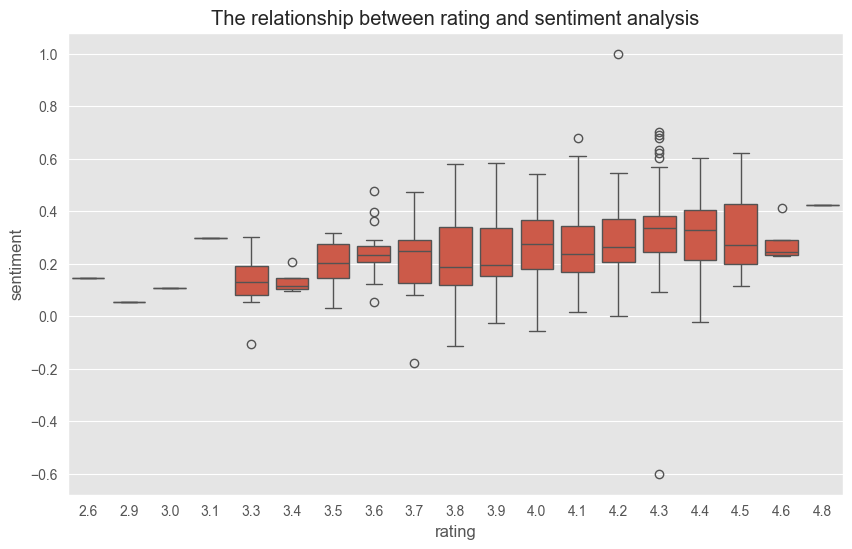

The correlation coefficient between ratings and emotional scores: 0.27415002758573287


In [50]:
# Define a function to conduct sentiment analysis on user comments
def sentiment_analysis(df):
    # Apply sentiment analysis to review content and assign polarity scores to 'sentiment' column
    df['sentiment'] = df['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Set figure size for the box plot
    plt.figure(figsize=(10, 6))
    
    # Create a box plot to visualize the relationship between ratings and sentiment
    sns.boxplot(x='rating', y='sentiment', data=df)
    
    # Set the title for the plot
    plt.title('The relationship between rating and sentiment analysis')
    
    # Display the box plot
    plt.show()

    # Calculate the correlation coefficient between ratings and sentiment scores
    sentiment_correlation = df[['rating', 'sentiment']].corr().iloc[0, 1]
    
    # Print the correlation coefficient
    print(f"The correlation coefficient between ratings and emotional scores: {sentiment_correlation}")

# Call the function to perform sentiment analysis
sentiment_analysis(df)



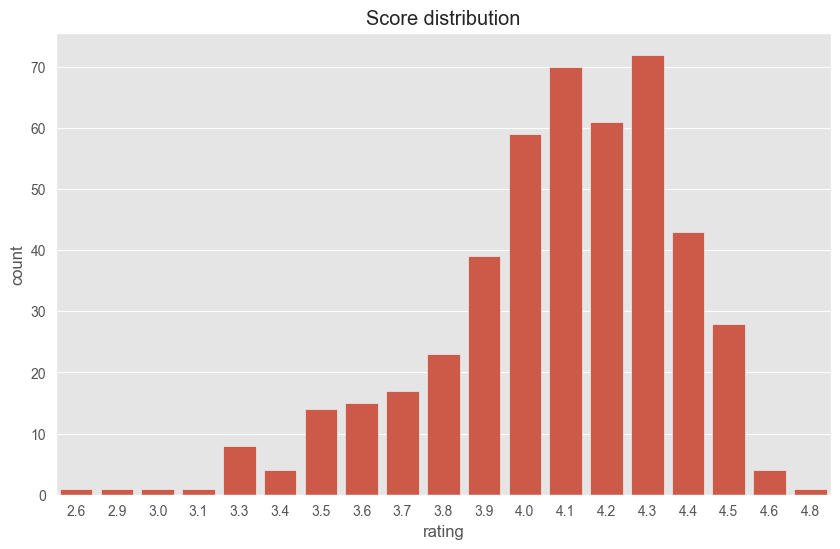

Score distribution:
 rating
2.6     1
2.9     1
3.0     1
3.1     1
3.3     8
3.4     4
3.5    14
3.6    15
3.7    17
3.8    23
3.9    39
4.0    59
4.1    70
4.2    61
4.3    72
4.4    43
4.5    28
4.6     4
4.8     1
Name: count, dtype: int64


In [51]:
# 3.Data distribution: Analyze the score distribution to see if there are abnormally high or low scores

# Define a function to analyze the distribution of ratings
def analyze_rating_distribution(df):
    # Set figure size for the count plot
    plt.figure(figsize=(10, 6))
    
    # Create a count plot to visualize the distribution of ratings
    sns.countplot(x='rating', data=df)
    
    # Set the title for the plot
    plt.title('Score distribution')
    
    # Display the count plot
    plt.show()

    # Count the occurrences of each rating and sort by index
    rating_counts = df['rating'].value_counts().sort_index()
    
    # Print the distribution of scores
    print("Score distribution:\n", rating_counts)

# Call the function to analyze the rating distribution
analyze_rating_distribution(df)


In [ ]:
pip install --upgrade matplotlib seaborn


## Question 4: Can user_id and orderTime data help identify user purchasing behavior and patterns?

C:\Users\16348\AppData\Local\Temp\ipykernel_52160\2934810394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orderTime'] = pd.to_datetime(df['orderTime'])


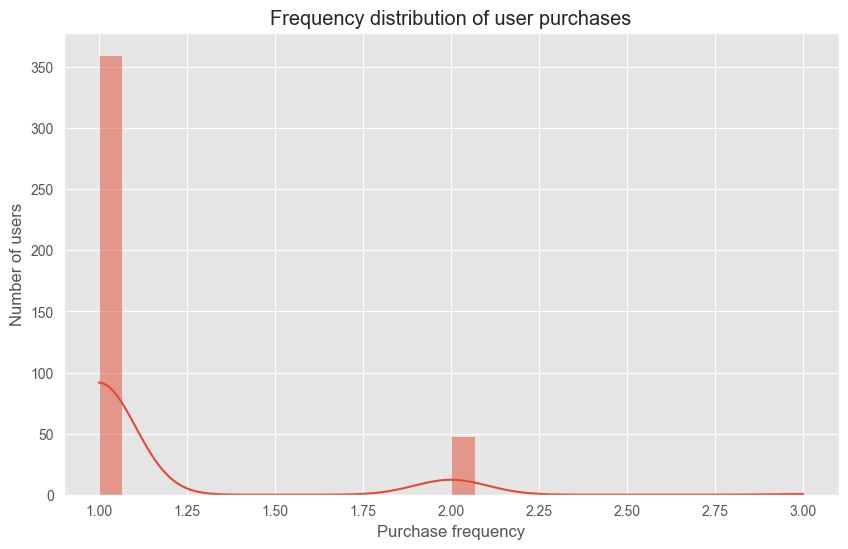

Number of loyal customers: 0
Occasional customer count: 410


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'orderTime' column to datetime type
df['orderTime'] = pd.to_datetime(df['orderTime'])

# Define a function to analyze user purchase frequency
def user_purchase_frequency(df):
    # Count the number of purchases per user and reset index for plotting
    purchase_frequency = df['user_id'].value_counts().reset_index()
    purchase_frequency.columns = ['user_id', 'purchase_count']
    
    # Set figure size for the histogram
    plt.figure(figsize=(10, 6))
    
    # Plot the frequency distribution of user purchases
    ax = sns.histplot(purchase_frequency['purchase_count'], bins=30, kde=True)
    ax.set_title('Frequency distribution of user purchases')
    ax.set_xlabel('Purchase frequency')
    ax.set_ylabel('Number of users')
    
    # Display the histogram
    plt.show()
    
    # Identify loyal customers with more than 5 purchases
    loyal_customers = purchase_frequency[purchase_frequency['purchase_count'] > 5]
    
    # Identify occasional customers with 5 or fewer purchases
    occasional_customers = purchase_frequency[purchase_frequency['purchase_count'] <= 5]
    
    # Print the number of loyal and occasional customers
    print(f"Number of loyal customers: {len(loyal_customers)}")
    print(f"Occasional customer count: {len(occasional_customers)}")

# Call the function to perform user purchase frequency analysis
user_purchase_frequency(df)



  user_id  total_spent  average_spent  purchase_count customer_type
0    7215       179.00         179.00               1    Occasional
1    7216       299.00         299.00               1    Occasional
2    7218       100.00         100.00               1    Occasional
3    7219       417.44         417.44               1    Occasional
4    7222       199.00         199.00               1    Occasional


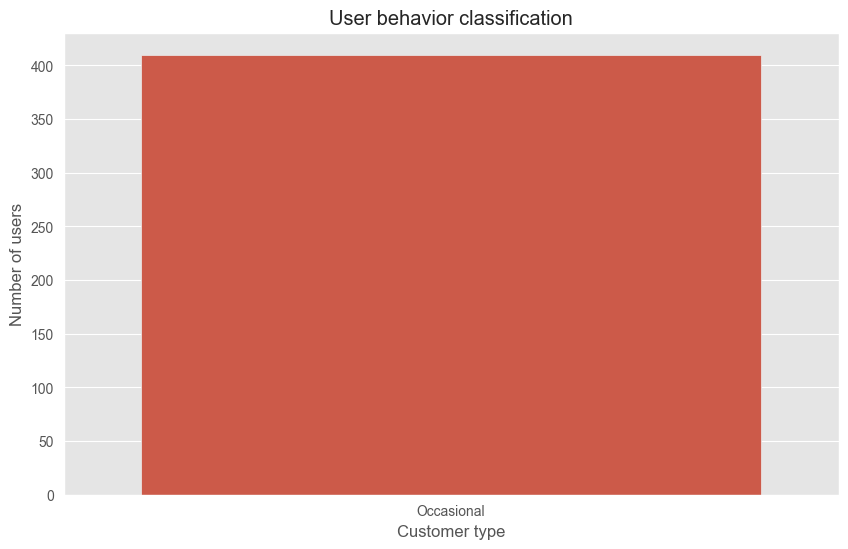

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. User behavior classification: Classify users based on purchase frequency and amount, such as high-value customers, potential customers

# Define a function to classify user behavior based on purchase patterns
def classify_user_behavior(df):
    # Aggregate user purchase data by user_id
    user_purchase_stats = df.groupby('user_id').agg({
        'discounted_price': ['sum', 'mean', 'count']
    }).reset_index()
    
    # Rename columns for clarity
    user_purchase_stats.columns = ['user_id', 'total_spent', 'average_spent', 'purchase_count']
    
    # Classify users into High Value, Loyal, or Occasional based on spending and frequency
    user_purchase_stats['customer_type'] = np.where(
        (user_purchase_stats['total_spent'] > 500) & (user_purchase_stats['purchase_count'] > 5), 'High Value',
        np.where(
            (user_purchase_stats['total_spent'] <= 500) & (user_purchase_stats['purchase_count'] > 5), 'Loyal',
            'Occasional'
        )
    )
    
    # Display the first few rows of the classified user data
    print(user_purchase_stats.head())
    
    # Set figure size for the count plot
    plt.figure(figsize=(10, 6))
    
    # Plot the distribution of customer types
    ax = sns.countplot(x='customer_type', data=user_purchase_stats)
    ax.set_title('User behavior classification')
    ax.set_xlabel('Customer type')
    ax.set_ylabel('Number of users')
    
    # Display the count plot
    plt.show()
    
    # Return the user purchase statistics DataFrame
    return user_purchase_stats

# Call the function to classify user behavior and store the results
user_purchase_stats = classify_user_behavior(df)



In [55]:
df['user_id']

1       7441
3       7922
4       7545
6       7961
7       7539
        ... 
1448    8203
1449    7448
1452    7758
1459    7598
1460    7849
Name: user_id, Length: 462, dtype: object

In [59]:
# 4 Return user type based on user_id
# Define a function to return the user type based on user_id
def get_user_type(user_id, user_purchase_stats):
    # Retrieve user information for the specified user_id
    user_info = user_purchase_stats[user_purchase_stats['user_id'] == user_id]
    # Check if user_info is not empty
    if not user_info.empty:
        # Assign the customer_type to user_type
        user_type = user_info['customer_type'].values[0]
        # Return the user_id and user_type
        return f"user {user_id} is {user_type}"
    else:
        # Return a message indicating the user does not exist or has no purchase record
        return f"user {user_id} Does not exist or has no purchase record"

# Specify a user_id to query
user_id = "7222"
# Call the function to get the user type for the specified user_id
user_type = get_user_type(user_id, user_purchase_stats)
# Display the user type
user_type


'user 7222 is Occasional'

# Step 5: Perform predictive analysis & visualization
TODO - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

mean squared error: 0.09301798924731185
R² Score: 0.1684624403100775


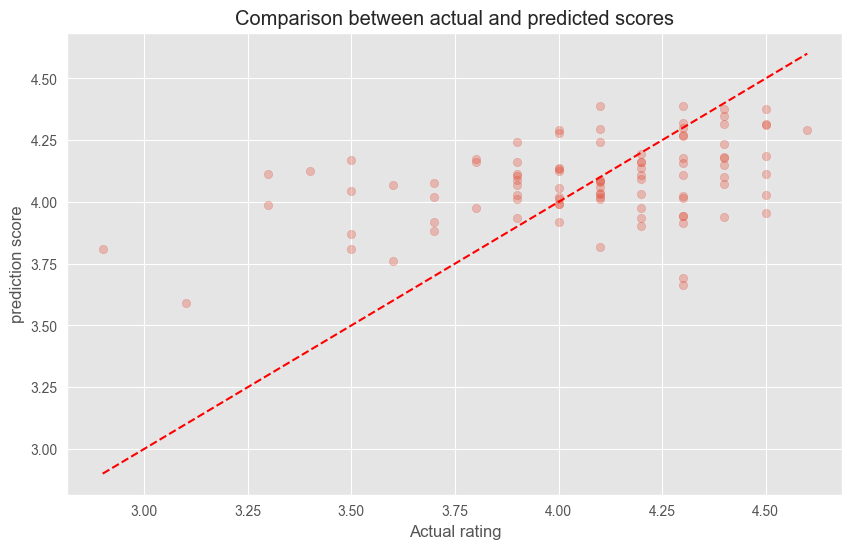

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define target variable and predictor variables
target = 'rating'
predictors = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']

# Set sizes for validation and test sets, random state, number of estimators for Random Forest, and number of jobs for parallel processing
VALID_SIZE = 0.20  # Validation set size
TEST_SIZE = 0.20  # Test set size
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100  # Number of trees in the Random Forest
NO_JOBS = 4  # Number of jobs to run in parallel

# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)

# Further split the training set into training and validation sets
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

# Initialize a Random Forest Regressor model
clf = RandomForestRegressor(n_jobs=NO_JOBS, 
                            random_state=RANDOM_STATE,
                            n_estimators=NUM_ESTIMATORS,
                            verbose=False)

# Train the model on the training data
clf.fit(train_df[predictors], train_df[target].values)

# Make predictions on the test data
preds = clf.predict(test_df[predictors])

# Calculate mean squared error and R² score
mse = mean_squared_error(test_df[target].values, preds)
r2 = r2_score(test_df[target].values, preds)
print(f"mean squared error: {mse}")
print(f"R² Score: {r2}")

# Plot a comparison chart between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test_df[target].values, preds, alpha=0.3)
plt.plot([test_df[target].values.min(), test_df[target].values.max()], 
         [test_df[target].values.min(), test_df[target].values.max()], 
         color='red', linestyle='--')
plt.xlabel('Actual rating')
plt.ylabel('prediction score')
plt.title('Comparison between actual and predicted scores')
plt.show()


# Step 6: Write a conclusion and make a submission & share your work

In this assignment, we preliminarily analyzed that there is a higher distribution of general trading on weekends, and the peak of trading starts from 3pm to 12pm every day, with few trading occurring in the early morning. Secondly, there is no clear pattern in the repurchase rate of users, which fluctuates in a straight line. There are a few discount_percentages that are not very accurate, and we analyzed the relationship between discount intensity and ratings, and their correlation coefficient is -0.4701, indicating a negative correlation between them, that is, discounts will have a negative impact on ratings. Then we checked the consistency between comments and ratings, and also found that their correlation coefficient was 0.274. This means that there is some correlation between the ratings given by users and their emotional scores (emotional polarity) in their comments, but this correlation is not particularly strong. Subsequently, we analyzed the user types and found that no customers were high-value or loyal, which also reflects that the repurchase rate of customers is not high enough. Finally, we used a random forest model to predict the score and found that the mean square error was very small but the R ² score was also not high, indicating that the model's ability to interpret data was weak and the prediction effect was not ideal.

I think I have learned a lot of knowledge in this semester's data analysis course. I am now able to read data, clean data, perform simple exploratory analysis, diagnostic analysis, and predictive analysis. During this process, I believe that my ability to read and write code has improved, and I hope to further study and research in this area in the future.